In [1]:
#Importing the required Libraries
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time

In [2]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

#function to load all the data into dataframes

def loading_all_data(filenames):

    # for the first dataset
    
    with h5py.File("../data_set/"+filenames[0], 'r') as hdf:
        
        # Development set
        W_dev = np.array(hdf.get('W_dev')).astype(np.float32)             # W
        X_s_dev = np.array(hdf.get('X_s_dev')).astype(np.float32)         # X_s
        Y_dev = np.array(hdf.get('Y_dev')).astype(np.float32)             # RUL  
        A_dev = np.array(hdf.get('A_dev')).astype(np.float32)
        #A_dev = np.delete(A_dev, 1, 1)
        d_train_num = np.ones((W_dev.shape[0], 1)).astype(np.float32)

        # Test set
        W_test = np.array(hdf.get('W_test')).astype(np.float32)           # W
        X_s_test = np.array(hdf.get('X_s_test')).astype(np.float32)       # X_s
        Y_test = np.array(hdf.get('Y_test')).astype(np.float32)           # RUL  
        A_test = np.array(hdf.get('A_test')).astype(np.float32)  # Auxiliary
        #A_test = np.delete(A_test, 1, 1)
        d_test_num = np.ones((W_test.shape[0], 1)).astype(np.float32)
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))        
        A_var = np.array(hdf.get('A_var'))

        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        A_var = list(np.array(A_var, dtype='U20'))
        
        # changing the contents of A_var
        A_var.append('Dataset Number')
        
    
    print("Dataset DS01 loaded")
    
    num = 50
    d_set = 1
    
    for file in filenames[1:]: 
    
        # Load data
        with h5py.File("../data_set/"+file, 'r') as hdf:
            
            # Development set
            W_dev = np.concatenate((W_dev, np.array(hdf.get('W_dev')).astype(np.float32)), axis=0)             # W
            X_s_dev = np.concatenate((X_s_dev, np.array(hdf.get('X_s_dev')).astype(np.float32)), axis=0)         # X_s
            Y_dev = np.concatenate((Y_dev, np.array(hdf.get('Y_dev')).astype(np.float32)), axis=0)             # RUL  
            
            Aux_raw = np.array(hdf.get('A_dev')).astype(np.float32)
            Aux_raw[:, 0] = Aux_raw[:, 0] + num
            #Aux_raw = np.delete(Aux_raw, 1, 1)
            
            A_dev = np.concatenate((A_dev, Aux_raw), axis=0)    # Auxiliary
            
            dataset_num = np.ones((Aux_raw.shape[0], 1)).astype(np.float32) + d_set
            
            d_train_num = np.concatenate((d_train_num, dataset_num), axis=0)

            #Test set
            W_test = np.concatenate((W_test, np.array(hdf.get('W_test')).astype(np.float32)), axis=0)           # W
            X_s_test = np.concatenate((X_s_test, np.array(hdf.get('X_s_test')).astype(np.float32)), axis=0)       # X_s
            Y_test = np.concatenate((Y_test, np.array(hdf.get('Y_test')).astype(np.float32)), axis=0)           # RUL  
            
            Aux_raw_test = np.array(hdf.get('A_test')).astype(np.float32)
            Aux_raw_test[:, 0] = Aux_raw_test[:, 0] + num
            #Aux_raw_test = np.delete(Aux_raw_test, 1, 1)
            
            A_test = np.concatenate((A_test, Aux_raw_test), axis=0) 
            
            dataset_test_num = np.ones((Aux_raw_test.shape[0], 1)).astype(np.float32) + d_set
            
            d_test_num = np.concatenate((d_test_num, dataset_test_num), axis=0)

        if d_set < 8:
            d_set += 1
     
        num += 50
        print(file, ' dataset loaded')
        

     
    # Combining the arrays, we have done this slightly differently as we are pulling them into dataframes
    
    X_train = np.concatenate((W_dev, X_s_dev, A_dev, d_train_num), axis=1)
    X_test = np.concatenate((W_test, X_s_test, A_test, d_test_num), axis=1)
    cols=[W_var, X_s_var, A_var]
    X_train = pd.DataFrame(X_train, columns= W_var + X_s_var + A_var)
    X_test = pd.DataFrame(X_test, columns= W_var + X_s_var + A_var)
    
    print('Finished loading datasets')
    print('X_train Shape: ', X_train.shape)
    print('X_test Shape:' , X_test.shape)
    
    
    return X_train, X_test, cols
    #return X_train,Y_dev,cols


filenames = ['N-CMAPSS_DS01.h5', 'N-CMAPSS_DS02.h5', 'N-CMAPSS_DS03-012.h5', 'N-CMAPSS_DS04.h5', 'N-CMAPSS_DS05.h5', 'N-CMAPSS_DS06.h5', 'N-CMAPSS_DS07.h5', 'N-CMAPSS_DS08a-009.h5', 'N-CMAPSS_DS08c-008.h5']


#X_train, X_test, Y_dev, Yloading_all_data(filenames)_test, cols = loading_all_data(filenames)
X_train, X_test, cols = loading_all_data(filenames)

Dataset DS01 loaded
N-CMAPSS_DS02.h5  dataset loaded
N-CMAPSS_DS03-012.h5  dataset loaded
N-CMAPSS_DS04.h5  dataset loaded
N-CMAPSS_DS05.h5  dataset loaded
N-CMAPSS_DS06.h5  dataset loaded
N-CMAPSS_DS07.h5  dataset loaded
N-CMAPSS_DS08a-009.h5  dataset loaded
N-CMAPSS_DS08c-008.h5  dataset loaded
Finished loading datasets
X_train Shape:  (44262110, 23)
X_test Shape: (25638191, 23)


In [3]:
#combining the Train and test sets

X_train=pd.concat([X_train,X_test],axis=0).reset_index().drop("index",axis=1)
del X_test


In [ ]:
X_train

In [ ]:
X_train["RUL"]=Y_dev

In [11]:
#assigning arbritrary numbers to the engine units

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
units=X_train["unit"]
new_units=le.fit_transform(units)+1
X_train["unit"]=new_units
del units
del new_units

In [12]:
X_train['Dataset Number'] = X_train['Dataset Number'].clip(upper=8)
pd.unique(X_train["Dataset Number"])

array([1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32)

In [6]:
#Summary of the Secnario Descriptors
X_train[cols[0]].describe()

alt          Mach           TRA            T2
count  4.426211e+07  4.426211e+07  4.426211e+07  4.426211e+07
mean   1.245277e+04  3.790424e-01  4.851743e+01  2.677515e+02
std    8.602904e+03  2.036820e-01  2.093381e+01  1.577509e+02
min    3.001000e+03  3.150000e-04  2.355452e+01  4.213779e+02
25%    1.017000e+04  4.597740e-01  4.842739e+01  4.707849e+02
50%    1.630600e+04  5.653620e-01  6.767530e+01  4.898136e+02
75%    2.398700e+04  6.497820e-01  7.795843e+01  5.046290e+02
max    3.503300e+04  7.492590e-01  8.876890e+01  5.343834e+02

In [7]:
#Sample of Sensor data
X_train[cols[1]].head()

T24          T30          T48          T50        P15         P2  \
0  618.288574  1470.469849  1849.620728  1269.275635  19.432070  14.484612   
1  618.296326  1470.415649  1849.519897  1269.177124  19.431385  14.484683   
2  618.336487  1470.453857  1849.566162  1269.167358  19.435163  14.488223   
3  618.302185  1470.650879  1850.195068  1269.518677  19.426003  14.477633   
4  618.345215  1470.640381  1849.950928  1269.254028  19.427485  14.478113   

         P21        P24        Ps30         P40        P50           Nf  \
0  19.727989  24.410990  394.701874  401.205200  15.974771  2142.253418   
1  19.727295  24.410482  394.629913  401.132843  15.970518  2142.218506   
2  19.731129  24.415476  394.667847  401.171387  15.969419  2142.258057   
3  19.721830  24.406544  394.773529  401.272705  15.967762  2142.794678   
4  19.723335  24.410158  394.732147  401.234619  15.962570  2143.015137   

            Nc        Wf  
0  8693.176758  4.621622  
1  8693.000000  4.620561  
2  8693.106445  4.621065  
3  8693.680664  4.624305  
4  8693.714844  4.622768

In [86]:
#sample of Auxiliary Data
X_train[cols[2]].head()

unit  cycle   Fc   hs  Dataset Number
0     1    1.0  1.0  1.0             1.0
1     1    1.0  1.0  1.0             1.0
2     1    1.0  1.0  1.0             1.0
3     1    1.0  1.0  1.0             1.0
4     1    1.0  1.0  1.0             1.0

# Visualising Data for single cycle of a single engine

In [10]:
#Choosing the data about the first cycle of unit 1
one=X_train.loc[(X_train["unit"]==1)&(X_train["cycle"]==1)]
one

alt      Mach        TRA          T2         T24          T30  \
0     3013.0  0.376362  70.311996  522.314758  618.288574  1470.469849   
1     3020.0  0.376866  70.311996  522.327148  618.296326  1470.415649   
2     3025.0  0.377685  70.311996  522.371826  618.336487  1470.453857   
3     3035.0  0.376992  70.399887  522.282410  618.302185  1470.650879   
4     3043.0  0.377622  70.399887  522.300598  618.345215  1470.640381   
...      ...       ...        ...         ...         ...          ...   
4493  3024.0  0.270963  26.982229  515.343811  567.172058  1265.349976   
4494  3022.0  0.270963  26.982229  515.351624  567.181458  1265.378662   
4495  3016.0  0.271089  26.982229  515.379150  567.208618  1265.421631   
4496  3010.0  0.271404  26.982229  515.418762  567.247925  1265.491577   
4497  3005.0  0.272160  26.982229  515.477722  567.303467  1265.580933   

              T48          T50        P15         P2  ...        P50  \
0     1849.620728  1269.275635  19.432070  14.484612  ...  15.974771   
1     1849.519897  1269.177124  19.431385  14.484683  ...  15.970518   
2     1849.566162  1269.167358  19.435163  14.488223  ...  15.969419   
3     1850.195068  1269.518677  19.426003  14.477633  ...  15.967762   
4     1849.950928  1269.254028  19.427485  14.478113  ...  15.962570   
...           ...          ...        ...        ...  ...        ...   
4493  1474.595825  1115.740234  16.139324  13.806794  ...  14.262538   
4494  1474.634521  1115.763184  16.140707  13.807887  ...  14.263714   
4495  1474.711914  1115.829468  16.144640  13.811447  ...  14.266752   
4496  1474.793335  1115.880371  16.149891  13.816209  ...  14.270105   
4497  1474.892212  1115.925659  16.156658  13.822609  ...  14.273143   

               Nf           Nc        Wf  unit  cycle   Fc   hs  \
0     2142.253418  8693.176758  4.621622     1    1.0  1.0  1.0   
1     2142.218506  8693.000000  4.620561     1    1.0  1.0  1.0   
2     2142.258057  8693.106445  4.621065     1    1.0  1.0  1.0   
3     2142.794678  8693.680664  4.624305     1    1.0  1.0  1.0   
4     2143.015137  8693.714844  4.622768     1    1.0  1.0  1.0   
...           ...          ...       ...   ...    ...  ...  ...   
4493  1602.631714  8011.419434  2.139888     1    1.0  1.0  1.0   
4494  1602.659058  8011.522461  2.140180     1    1.0  1.0  1.0   
4495  1602.668945  8011.647949  2.140736     1    1.0  1.0  1.0   
4496  1602.721802  8011.873047  2.141428     1    1.0  1.0  1.0   
4497  1602.805420  8012.157715  2.142244     1    1.0  1.0  1.0   

      Dataset Number   RUL  
0                1.0  99.0  
1                1.0  99.0  
2                1.0  99.0  
3                1.0  99.0  
4                1.0  99.0  
...              ...   ...  
4493             1.0  99.0  
4494             1.0  99.0  
4495             1.0  99.0  
4496             1.0  99.0  
4497             1.0  99.0  

[4498 rows x 24 columns]

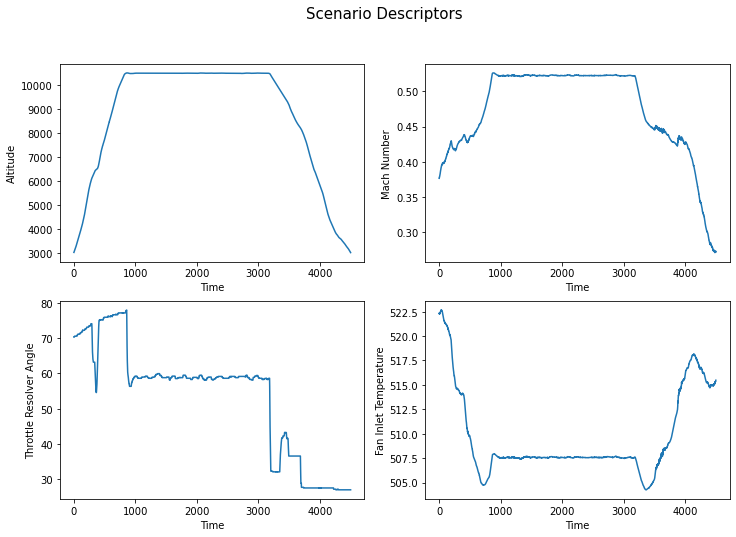

In [29]:
#plotting the variation of the scenario descriptors
#through the first flight

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
ylabs=["Altitude","Mach Number","Throttle Resolver Angle","Fan Inlet Temperature"]
x=0
for i in range(2):
    for j in range(2):
        axes[i][j].plot(one[cols[0][x]])
        axes[i][j].set_xlabel("Time",fontsize=10)
        axes[i][j].set_ylabel(ylabs[x],fontsize=10)
        x+=1
plt.suptitle("Scenario Descriptors", fontsize=15)
plt.savefig('Figures/Scenario Descriptors.png', dpi=200)

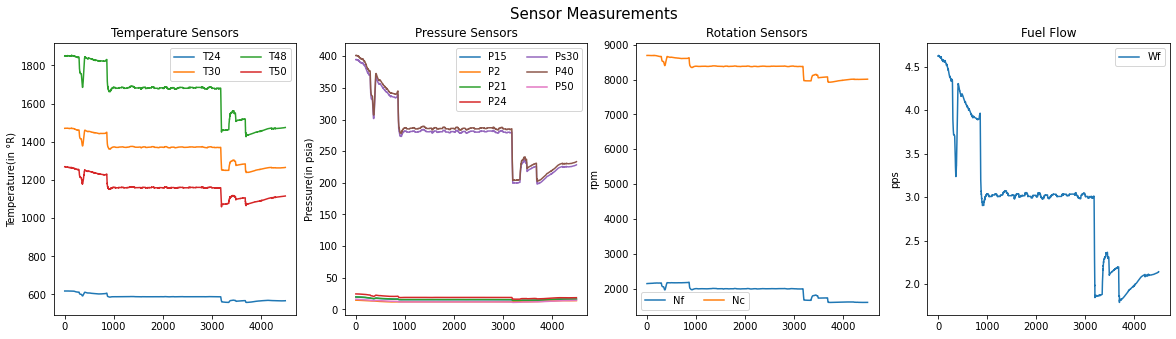

In [25]:
#plotting the changes in the sensor measurements
#through the first flight

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
temp=["T24","T30","T48","T50"]
press=["P15","P2","P21","P24","Ps30","P40","P50"]
oth=["Nf","Nc"]
ff=["Wf"]
titles=["Temperature Sensors","Pressure Sensors","Rotation Sensors","Fuel Flow"]
ylabs=["Temperature(in °R)","Pressure(in psia)","rpm","pps"]
sensors=[temp,press,oth,ff]
for j in range(4):
    x=0
    for i in sensors[j]:
        axes[j].plot(one[i],label=i)
        axes[j].legend(ncol=2)
        axes[j].set_title(titles[j])
        axes[j].set_ylabel(ylabs[j])
        x+=1
plt.suptitle("Sensor Measurements",fontsize=15)
plt.savefig('Figures/Sensor Measurements.png', dpi=200)

# Checking the balance of the dataset

In [132]:
#Computing the total number of observations per flight class

temp=X_train.groupby("Fc")
myDict={}
for i in temp:
    myDict[i[0]]=len(i[1])
print(myDict)

{1.0: 10002424, 2.0: 21600681, 3.0: 38297196}


In [133]:
temp=pd.DataFrame(myDict,index=[0]).T
temp=temp.reset_index()
temp.columns=["Dataset Number","count"]
temp

Dataset Number    count 
0        1.0       10002424
1        2.0       21600681
2        3.0       38297196

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


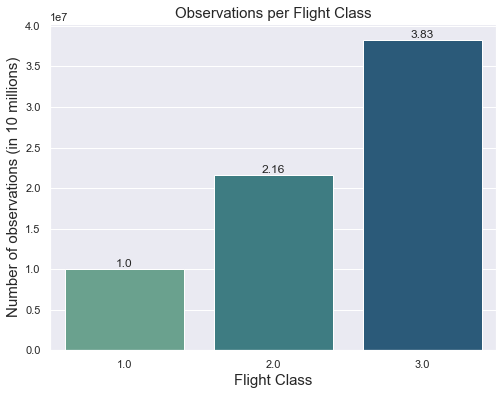

In [135]:
plt.figure(figsize=(8,6))
ax=sns.barplot(temp["Dataset Number"],temp["count"],palette="crest")
ax.bar_label(ax.containers[0],round(temp["count"]/10000000,2))
ax.set_xlabel("Flight Class",fontsize=15)
plt.title("Observations per Flight Class",fontsize=15)
ax.set_ylabel("Number of observations (in 10 millions)",fontsize=15)
plt.savefig('Figures/count per Fc.png', dpi=200)

In [139]:
a=X_train[cols[2]].drop(["cycle","hs"],axis=1).drop_duplicates()
a

unit  Fc   Dataset Number
0           1   1.0        1.0     
433325      2   3.0        1.0     
1482413     3   2.0        1.0     
2375467     4   1.0        1.0     
2789639     5   3.0        1.0     
...        ...  ...             ...
67477349   89   1.0        8.0     
67782482   96   2.0        8.0     
68325516   97   2.0        8.0     
68881226   98   2.0        8.0     
69420498   99   2.0        8.0     

[99 rows x 3 columns]

In [140]:
fc=pd.DataFrame(columns=["Flight Class","Units","Count"])
for i in a.groupby("Fc"):
    fc=fc.append({"Flight Class":i[0],"Units":list(i[1]["unit"]),
               "Count":len(list(i[1]["unit"]))},ignore_index=True)
ds=pd.DataFrame(columns=["Dataset Number","Units","Count"])
for i in a.groupby("Dataset Number"):
    ds=ds.append({"Dataset Number":i[0],"Units":list(i[1]["unit"]),
               "Count":len(list(i[1]["unit"]))},ignore_index=True)

In [41]:
pd.options.display.max_colwidth = 160
pd.options.display.colheader_justify= 'center'
fc.style.set_properties(**{'text-align': 'left'})
fc

Flight Class  \
0       1.0       
1       2.0       
2       3.0       

                                                                             Units                                                                             \
0                                                    [1, 4, 20, 24, 28, 48, 49, 58, 59, 68, 69, 75, 77, 83, 7, 9, 15, 31, 33, 52, 54, 62, 64, 72, 74, 84, 89]   
1                           [3, 6, 21, 22, 23, 26, 35, 37, 45, 47, 55, 57, 65, 67, 78, 79, 81, 82, 95, 8, 16, 34, 41, 42, 43, 51, 61, 71, 85, 96, 97, 98, 99]   
2  [2, 5, 11, 12, 13, 17, 18, 19, 25, 27, 36, 38, 39, 40, 46, 50, 56, 60, 66, 70, 76, 80, 90, 91, 92, 93, 94, 10, 14, 29, 30, 32, 44, 53, 63, 73, 86, 87, 88]   

  Count  
0   27   
1   33   
2   39

In [42]:
pd.options.display.max_colwidth = 160
pd.options.display.colheader_justify= 'center'
ds.style.set_properties(**{'text-align': 'left'})
display(ds)

Dataset Number  \
0        1.0        
1        2.0        
2        3.0        
3        4.0        
4        5.0        
5        6.0        
6        7.0        
7        8.0        

                                                  Units                                                  \
0                                                                       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
1                                                                  [11, 12, 13, 17, 18, 19, 14, 15, 16]   
2                                          [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]   
3                                                              [35, 36, 37, 38, 39, 40, 41, 42, 43, 44]   
4                                                              [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]   
5                                                              [55, 56, 57, 58, 59, 60, 61, 62, 63, 64]   
6                                                              [65, 66, 67, 68, 69, 70, 71, 72, 73, 74]   
7  [75, 76, 77, 78, 79, 80, 81, 82, 83, 90, 91, 92, 93, 94, 95, 84, 85, 86, 87, 88, 89, 96, 97, 98, 99]   

  Count  
0   10   
1    9   
2   15   
3   10   
4   10   
5   10   
6   10   
7   25

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


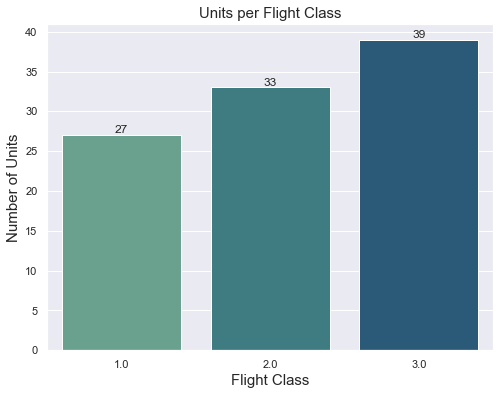

In [141]:
#Number of units per flight class

plt.figure(figsize=(8,6))
sns.set()
ax=sns.barplot(fc["Flight Class"],fc["Count"],palette="crest")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Flight Class",fontsize=15)
plt.title("Units per Flight Class",fontsize=15)
ax.set_ylabel("Number of Units",fontsize=15)
plt.savefig('Figures/Units per flight class.png', dpi=200)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


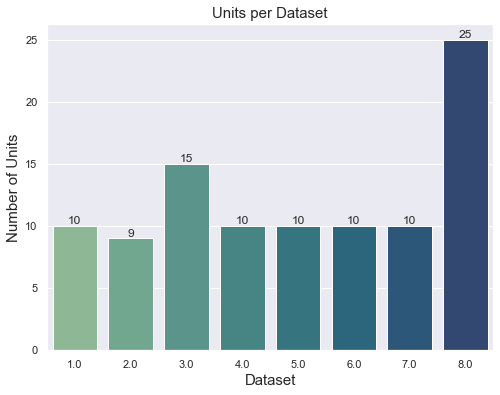

In [143]:
#Number of units per Dataset

plt.figure(figsize=(8,6))
ax=sns.barplot(ds["Dataset Number"],ds["Count"],palette="crest")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Dataset",fontsize=15)
plt.title("Units per Dataset",fontsize=15)
ax.set_ylabel("Number of Units",fontsize=15)
plt.savefig('Figures/units per ds.png', dpi=200)

## Distribution of Flight Time

In [150]:
myData=X_train[["unit","Fc","cycle"]]

In [151]:
#computing the average flight time of the units
avg=[]
for i in myData.groupby("unit"):
    a=len(i[1])/max(i[1]["cycle"])
    avg.append(a)
    

In [152]:
myData=myData.drop("cycle",axis=1).sort_values(by="unit").drop_duplicates()

In [153]:
myData["AvgFlight"]=avg
myData[myData["Fc"]==1]

unit  Fc    AvgFlight 
0           1   1.0  4333.250000
2651571     4   1.0  4359.705263
44523828    7   1.0  4362.055556
45689445    9   1.0  4396.037500
47679851   15   1.0  2062.868421
10274755   20   1.0  4284.569444
12522091   24   1.0  4313.365591
15411080   28   1.0  4335.500000
50039921   31   1.0  4359.236559
51559846   33   1.0  4545.842105
24953253   48   1.0  4473.949495
25469831   49   1.0  4501.600000
57110113   52   1.0  4264.604396
58313422   54   1.0  4507.207317
29217195   58   1.0  4458.413793
29718624   59   1.0  4513.373737
59605835   62   1.0  4264.604396
60943302   64   1.0  4507.207317
33365708   68   1.0  4489.278481
33928762   69   1.0  4509.352941
61953541   72   1.0  4240.301205
63928571   74   1.0  4514.114943
35290873   75   1.0  4459.777778
36461318   77   1.0  4538.920000
39828884   83   1.0  4209.852632
64284043   84   1.0  4318.384615
67773916   89   1.0  4237.958333

In [154]:
fc=pd.DataFrame(columns=["Flight Class","Average Flight Time"])
for i in myData.groupby("Fc"):
    fc=fc.append({"Flight Class":i[0],"Average Flight Time":np.mean(i[1]["AvgFlight"])/3600},ignore_index=True)
avgf=fc["Average Flight Time"]

In [155]:
myData=X_train[["unit","Fc","cycle"]]

In [156]:
flightTime=[]
for i in myData.groupby("unit"):
    for j in i[1].groupby("cycle"):
        a=len(j[1])
        flightTime.append(a/3600)
    

In [157]:
myData=myData.sort_values(by="unit").drop_duplicates()

In [158]:
myData["Flight Time"]=flightTime
myData

unit  Fc   cycle  Flight Time
0           1   1.0   1.0    1.249444  
288889      1   1.0  68.0    1.294444  
285504      1   1.0  67.0    1.487500  
295660      1   1.0  70.0    1.161389  
294814      1   1.0  69.0    1.248611  
...        ...  ...    ...          ...
69560428   99   2.0  16.0    1.991111  
69569817   99   2.0  18.0    1.622500  
69545452   99   2.0  15.0    3.390556  
69590434   99   2.0  20.0    2.582500  
69586685   99   2.0  19.0    1.642222  

[7473 rows x 4 columns]

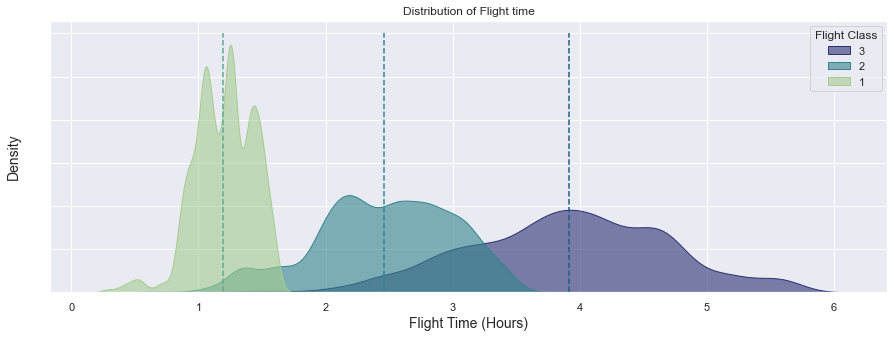

In [159]:
plt.figure(figsize=(15,5))
sns.kdeplot("Flight Time",data=myData,hue="Fc",palette="crest",fill=True, alpha=0.6)
plt.vlines(x=avgf,ymin=0,ymax=0.6,colors=sns.color_palette("crest", 3),linestyles="dashed")
plt.title("Distribution of Flight time")
plt.xlabel('Flight Time (Hours)', fontsize=14)
plt.yticks(color='w')
plt.ylabel('Density', fontsize=14)
plt.legend(title="Flight Class",labels=[3,2,1])
plt.savefig('Figures/Distribution of Flight time.png', dpi=200)

### Visualising the different flight classes

In [162]:
# unit 1 is fc 1, unit 2 is fc 3, unit 3 is fc 2

df = X_train[X_train['Dataset Number'] == 1]

fc_1 = df[df['unit']==1][['cycle', 'alt']]
fc_2 = df[df['unit']==3][['cycle', 'alt']]
fc_3 = df[df['unit']==2][['cycle', 'alt']]

In [163]:
df[df['unit']==3]

alt     Mach       TRA         T2          T24         T30      \
1482413  3001.0  0.320859  81.649811  518.427063  624.752625  1507.382202   
1482414  3012.0  0.321174  81.737701  518.414062  624.734009  1507.557739   
1482415  3013.0  0.326214  81.737701  518.728760  625.070007  1507.985718   
1482416  3015.0  0.326466  81.649811  518.744812  625.098938  1507.806274   
1482417  3020.0  0.324891  81.649811  518.622864  624.933533  1507.565918   
...         ...       ...        ...         ...         ...          ...   
2375462  3021.0  0.243306  40.077839  513.910828  580.048035  1329.188354   
2375463  3018.0  0.243999  40.077839  513.954102  580.086121  1329.253784   
2375464  3012.0  0.244125  40.077839  513.982910  580.118958  1329.304932   
2375465  3008.0  0.244188  40.077839  514.000916  580.139282  1329.350952   
2375466  3003.0  0.244251  40.077839  514.021240  580.161316  1329.391846   

             T48          T50         P15        P2      ...     P50     \
1482413  1927.379883  1308.541138  19.623833  14.105026  ...  16.426842   
1482414  1928.367065  1309.243164  19.620005  14.101933  ...  16.428949   
1482415  1928.746094  1309.287231  19.658482  14.132436  ...  16.438206   
1482416  1927.629150  1308.384766  19.659670  14.133662  ...  16.428307   
1482417  1927.623657  1308.523193  19.641350  14.120923  ...  16.422909   
...              ...          ...        ...        ...  ...        ...   
2375462  1611.722656  1177.529541  16.755396  13.673402  ...  14.648464   
2375463  1611.848145  1177.605103  16.760292  13.677922  ...  14.650622   
2375464  1611.870605  1177.616333  16.764732  13.681628  ...  14.653639   
2375465  1611.919067  1177.647095  16.767628  13.683995  ...  14.655988   
2375466  1611.975342  1177.691284  16.770855  13.686699  ...  14.658590   

             Nf           Nc          Wf     unit  cycle  Fc   hs   \
1482413  2238.004395  8808.902344  5.225195    3     1.0  2.0  1.0   
1482414  2238.109863  8809.270508  5.230873    3     1.0  2.0  1.0   
1482415  2238.654297  8810.586914  5.238232    3     1.0  2.0  1.0   
1482416  2238.697510  8810.236328  5.231219    3     1.0  2.0  1.0   
1482417  2238.190186  8809.408203  5.228309    3     1.0  2.0  1.0   
...              ...          ...       ...   ...    ...  ...  ...   
2375462  1789.800415  8224.708008  2.820865    3   100.0  2.0  0.0   
2375463  1789.829712  8224.892578  2.821804    3   100.0  2.0  0.0   
2375464  1789.895508  8225.060547  2.822352    3   100.0  2.0  0.0   
2375465  1789.940186  8225.212891  2.822892    3   100.0  2.0  0.0   
2375466  1789.965942  8225.338867  2.823464    3   100.0  2.0  0.0   

         Dataset Number   RUL  
1482413        1.0       99.0  
1482414        1.0       99.0  
1482415        1.0       99.0  
1482416        1.0       99.0  
1482417        1.0       99.0  
...                 ...   ...  
2375462        1.0        0.0  
2375463        1.0        0.0  
2375464        1.0        0.0  
2375465        1.0        0.0  
2375466        1.0        0.0  

[893054 rows x 24 columns]

In [164]:
new =  fc_1[fc_1['cycle']==1]['alt']

fc_1_wide = pd.DataFrame(new).rename(columns={'alt':1})

for cycles in fc_1['cycle'].unique()[1:,]:
    data = fc_1[fc_1['cycle']==cycles]['alt']
    b = pd.DataFrame(data).rename(columns={'alt':cycles}).reset_index().drop(columns=['index'])
    fc_1_wide = pd.concat([fc_1_wide, b], axis=1)
    
new_2 =  fc_2[fc_2['cycle']==1]['alt'].reset_index().drop(columns=['index'])
fc_2_wide = pd.DataFrame(new_2).rename(columns={'alt':1})

for cycles in fc_2['cycle'].unique()[1:,]:
    data = fc_2[fc_2['cycle']==cycles]['alt']
    a = pd.DataFrame(data).rename(columns={'alt':cycles}).reset_index().drop(columns=['index'])
    fc_2_wide = pd.concat([fc_2_wide, a], axis=1)

new_3 =  fc_3[fc_3['cycle']==1]['alt'].reset_index().drop(columns=['index'])
fc_3_wide = pd.DataFrame(new_2).rename(columns={'alt':1})

for cycles in fc_3['cycle'].unique()[1:,]:
    data = fc_3[fc_3['cycle']==cycles]['alt']
    c = pd.DataFrame(data).rename(columns={'alt':cycles}).reset_index().drop(columns=['index'])
    fc_3_wide = pd.concat([fc_3_wide, c], axis=1)
    
fc_3_wide

1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0     9.0    \
0      3001.0  3002.0  3004.0  3004.0  3001.0  3005.0  3005.0  3003.0  3004.0   
1      3012.0  3008.0  3007.0  3015.0  3008.0  3023.0  3004.0  3010.0  3011.0   
2      3013.0  3015.0  3020.0  3026.0  3016.0  3039.0  3012.0  3019.0  3020.0   
3      3015.0  3020.0  3026.0  3037.0  3024.0  3056.0  3021.0  3024.0  3026.0   
4      3020.0  3026.0  3030.0  3048.0  3027.0  3071.0  3027.0  3029.0  3029.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
20289     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20290     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20291     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20292     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20293     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

        10.0   ...   66.0    67.0    68.0    69.0    70.0    71.0    72.0   \
0      3006.0  ...  3001.0  3002.0  3005.0  3005.0  3011.0  3002.0  3007.0   
1      3009.0  ...  3004.0  3007.0  3023.0  3013.0  3009.0  3008.0  3017.0   
2      3014.0  ...  3013.0  3018.0  3039.0  3021.0  3019.0  3015.0  3027.0   
3      3019.0  ...  3017.0  3030.0  3056.0  3033.0  3019.0  3020.0  3038.0   
4      3027.0  ...  3021.0  3036.0  3071.0  3036.0  3027.0  3026.0  3047.0   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
20289     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20290     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20291     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20292     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
20293     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

        73.0    74.0    75.0   
0      3003.0  3002.0  3004.0  
1      3015.0  3013.0  3007.0  
2      3025.0  3023.0  3018.0  
3      3034.0  3031.0  3020.0  
4      3046.0  3041.0  3028.0  
...       ...     ...     ...  
20289     NaN     NaN     NaN  
20290     NaN     NaN     NaN  
20291     NaN     NaN     NaN  
20292     NaN     NaN     NaN  
20293     NaN     NaN     NaN  

[20294 rows x 75 columns]

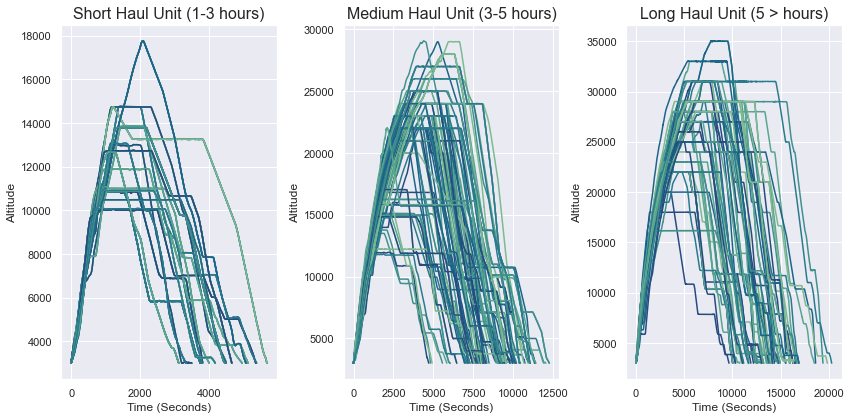

In [165]:
#Flight traces for 3 units from different flight classes
pal1 = sns.color_palette("crest")
sns.set_palette(pal1)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].plot(fc_1_wide)
ax[0].set_title('Short Haul Unit (1-3 hours)', fontsize=16)
ax[0].set_ylabel('Altitude', fontsize=12)
ax[0].set_xlabel('Time (Seconds)', fontsize=12)

ax[1].plot(fc_2_wide)
ax[1].set_title('Medium Haul Unit (3-5 hours)', fontsize=16)
ax[1].set_ylabel('Altitude', fontsize=12)
ax[1].set_xlabel('Time (Seconds)', fontsize=12)

ax[2].plot(fc_3_wide)
ax[2].set_title('Long Haul Unit (5 > hours)', fontsize=16)
ax[2].set_ylabel('Altitude', fontsize=12)
ax[2].set_xlabel('Time (Seconds)', fontsize=12)

plt.tight_layout()
plt.savefig('Figures/flight_visualisations.png', dpi=600)
plt.show()

## Visualising the spread of Altitude Measurements

In [160]:
myData=X_train[["alt","Mach","Dataset Number","Fc"]]

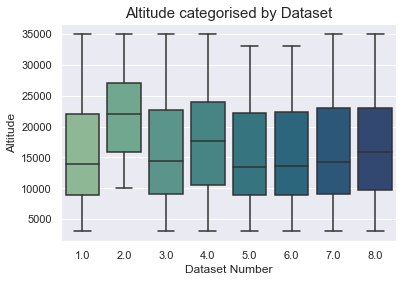

In [161]:
#Boxplot to show the spread of altitude measurements
sns.boxplot(y = myData["alt"],x=myData["Dataset Number"], data=myData,palette="crest")
plt.title("Altitude categorised by Dataset",fontsize=15)
plt.ylabel("Altitude")
plt.savefig('Figures/Altitude vd Dataset.png', dpi=200)

## Distribution of Maximum Cruising Altitude

In [170]:
myData=X_train[["unit","alt","cycle","Fc"]]

In [171]:
flightTime=[]
for i in myData.groupby("unit"):
    for j in i[1].groupby("cycle"):
        a=max(j[1]["alt"])
        flightTime.append(a)
    

In [172]:
myData=myData.drop("alt",axis=1).sort_values(by="unit").drop_duplicates()

In [173]:
myData["Max Altitude"]=flightTime
myData

unit  cycle  Fc   Max Altitude
0           1    1.0   1.0     10498.0  
288889      1   68.0   1.0     12750.0  
285504      1   67.0   1.0     10085.0  
295660      1   70.0   1.0     10942.0  
294814      1   69.0   1.0     14743.0  
...        ...    ...  ...           ...
69560428   99   16.0   2.0     23032.0  
69569817   99   18.0   2.0     14915.0  
69545452   99   15.0   2.0     22017.0  
69590434   99   20.0   2.0     29072.0  
69586685   99   19.0   2.0     17036.0  

[7473 rows x 4 columns]

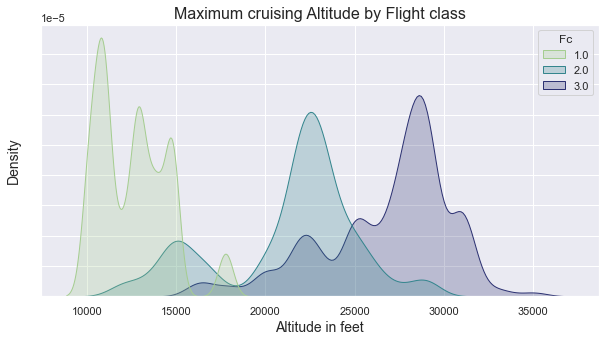

In [175]:
plt.figure(figsize=(10,5))
sns.kdeplot("Max Altitude",data=myData,hue=myData["Fc"],shade=True,palette="crest")
plt.title("Maximum cruising Altitude by Flight class",fontsize=16)
plt.xlabel('Altitude in feet', fontsize=14)
plt.yticks(color='w')
plt.ylabel('Density', fontsize=14)
plt.savefig('Figures/distribution of cruising altitude.png', dpi=200)

## Distribution of maximum speed 

In [178]:
myData=X_train[["unit","Mach","cycle","Fc"]]

In [179]:
flightTime=[]
for i in myData.groupby("unit"):
    for j in i[1].groupby("cycle"):
        a=max(j[1]["Mach"])
        flightTime.append(a)
    

In [180]:
myData=myData.drop("Mach",axis=1).sort_values(by="unit").drop_duplicates()

In [181]:
myData["Maximum Mach"]=flightTime
myData

unit  cycle  Fc   Maximum Mach
0           1    1.0   1.0    0.526428  
288889      1   68.0   1.0    0.554148  
285504      1   67.0   1.0    0.536067  
295660      1   70.0   1.0    0.514395  
294814      1   69.0   1.0    0.572103  
...        ...    ...  ...           ...
69560428   99   16.0   2.0    0.679644  
69569817   99   18.0   2.0    0.572166  
69545452   99   15.0   2.0    0.634662  
69590434   99   20.0   2.0    0.722799  
69586685   99   19.0   2.0    0.576261  

[7473 rows x 4 columns]

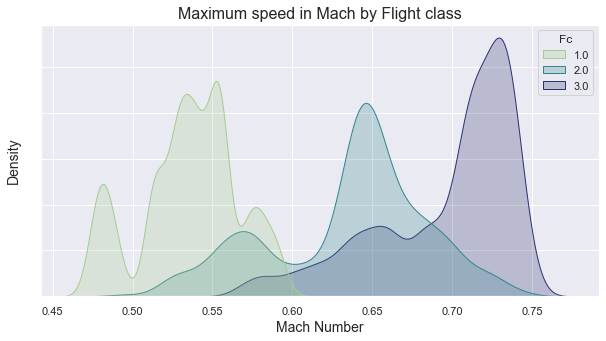

In [182]:
plt.figure(figsize=(10,5))
sns.kdeplot("Maximum Mach",data=myData,hue=myData["Fc"],shade=True,palette="crest")
plt.title("Maximum speed in Mach by Flight class",fontsize=16)
plt.xlabel('Mach Number', fontsize=14)
plt.yticks(color='w')
plt.ylabel('Density', fontsize=14)
plt.savefig('Figures/Distribution of speed.png', dpi=600)

### Visualising the varying lengths of lifes of engines

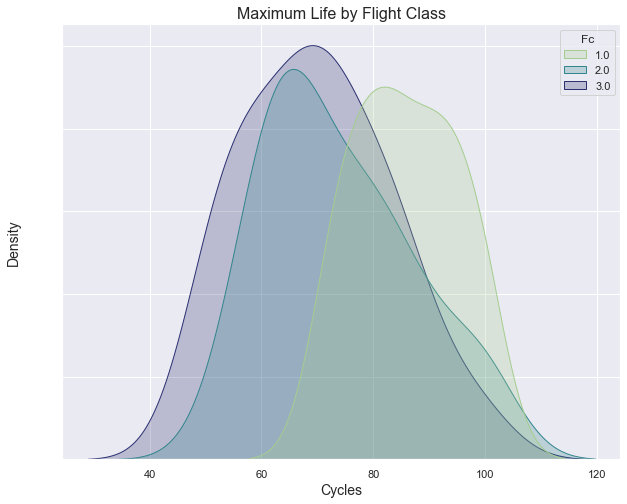

In [193]:
plt.figure(figsize=(10,8))

ax = X_train.groupby('unit')[['unit', 'cycle', 'Fc']].max()

sns.kdeplot(ax.cycle, hue=ax.Fc, shade = True,palette="crest")
plt.title('Maximum Life by Flight Class', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.yticks(color='w')
plt.ylabel('Density', fontsize=14)

plt.savefig('Figures/Maximum Life by Flight Class.png',dpi=200)
plt.show()

### Distribution of Unit life for the different fault modes

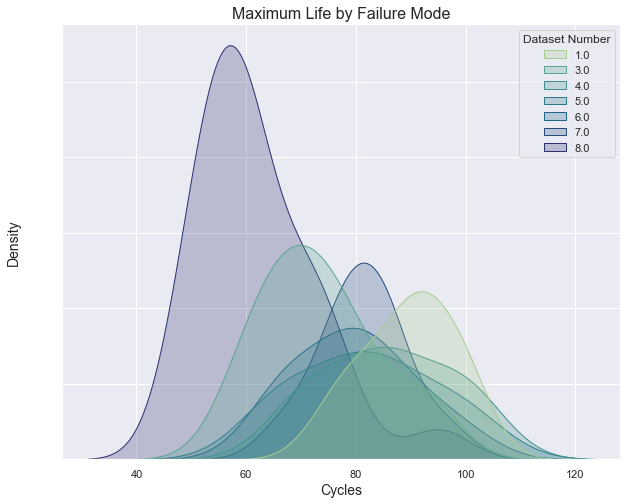

In [196]:
plt.figure(figsize=(10,8))
ax=X_train[X_train["Dataset Number"]!=2]
ax = ax.groupby('unit')[['unit', 'cycle', 'Dataset Number']].max()
#sns.set_palette("Blues")
sns.kdeplot(ax.cycle, hue=ax['Dataset Number'], shade = True, palette='crest')
plt.title('Maximum Life by Failure Mode', fontsize=16)
plt.xlabel('Cycles', fontsize=14)
plt.yticks(color='w')
plt.ylabel('Density', fontsize=14)

plt.savefig('Figures/Maximum Life by Dataset.png',dpi=200)
plt.show()

# Visualising the health state of the engines

In [14]:
myData=X_train[["unit","cycle","Fc","hs"]].drop_duplicates()

In [15]:
myData

unit  cycle   Fc   hs
0            1    1.0  1.0  1.0
4498         1    2.0  1.0  1.0
9158         1    3.0  1.0  1.0
14513        1    4.0  1.0  1.0
18694        1    5.0  1.0  1.0
...        ...    ...  ...  ...
69859877    99   50.0  2.0  0.0
69867045    99   51.0  2.0  0.0
69872886    99   52.0  2.0  0.0
69885092    99   53.0  2.0  0.0
69894389    99   54.0  2.0  0.0

[7473 rows x 4 columns]

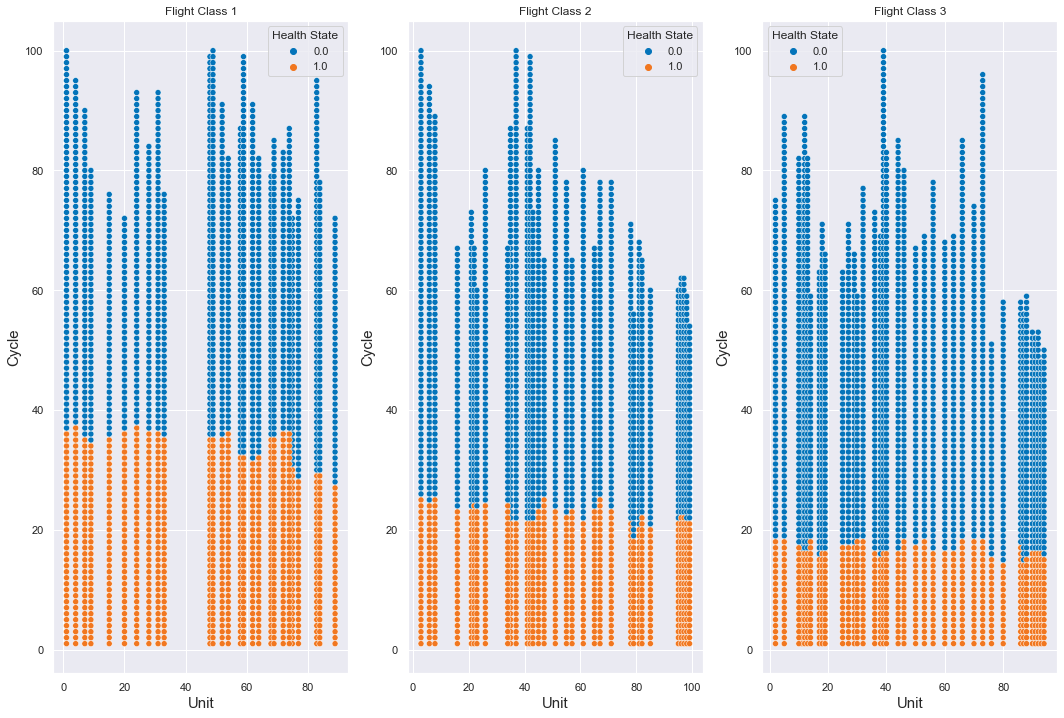

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,12))

for j in range(3):
    temp=myData[myData["Fc"]==j+1]
    sns.scatterplot(x=temp["unit"],y=temp["cycle"],hue=temp["hs"],ax=axes[j],palette=["#0474BA","#F17720"])
    sns.set()
    axes[j].set_title("Flight Class "+str(j+1))
    axes[j].set_xlabel("Unit",fontsize=15)
    axes[j].set_ylabel("Cycle",fontsize=15)
    axes[j].legend(title="Health State")
#plt.savefig('Figures/Sensor Measurements.png', dpi=200)

# Sensor variations for units of FC 3

In [204]:
fc3=X_train[X_train["Fc"]==3]

In [205]:
units=pd.unique(fc3["unit"])

In [206]:
def convert(cycles):
    allCycles=pd.DataFrame()
    for i in cycles:
        x=i[1].reset_index()
        allCycles=pd.concat([allCycles,x])
    return allCycles.drop(["cycle"],axis=1)

In [207]:
conv_units={}
for i in units:
    name=i
    conv=convert(X_train[X_train["unit"]==i].drop(columns=["alt","Mach","TRA","T2",'unit', 'Fc', 'hs']).groupby("cycle"))
    conv=conv.groupby(conv.index).mean().drop(["index"],axis=1)
    conv_units[name]=conv

In [208]:
conv_units={key:conv_units[key] for key in sorted(conv_units.keys())}

In [130]:
def sensorplot3(units):
    fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(20, 25))
    colours=cm.rainbow(np.linspace(0, 1, 8))
    x=0
    a=0
    sensorNames=cols[1]
    for j in range(0,7):
        for k in range(0,2):
            for unit in units.keys():
                ds = units[unit]["Dataset Number"].astype(int)[0]
                values=units[unit][sensorNames[x]]
                axes[j,k].plot(values, c=colours[ds-1],label= ds if ds != a else "")
                a = ds
            axes[j,k].set_ylabel(sensorNames[x])
            axes[j,k].legend(ncol=4)
            x+=1

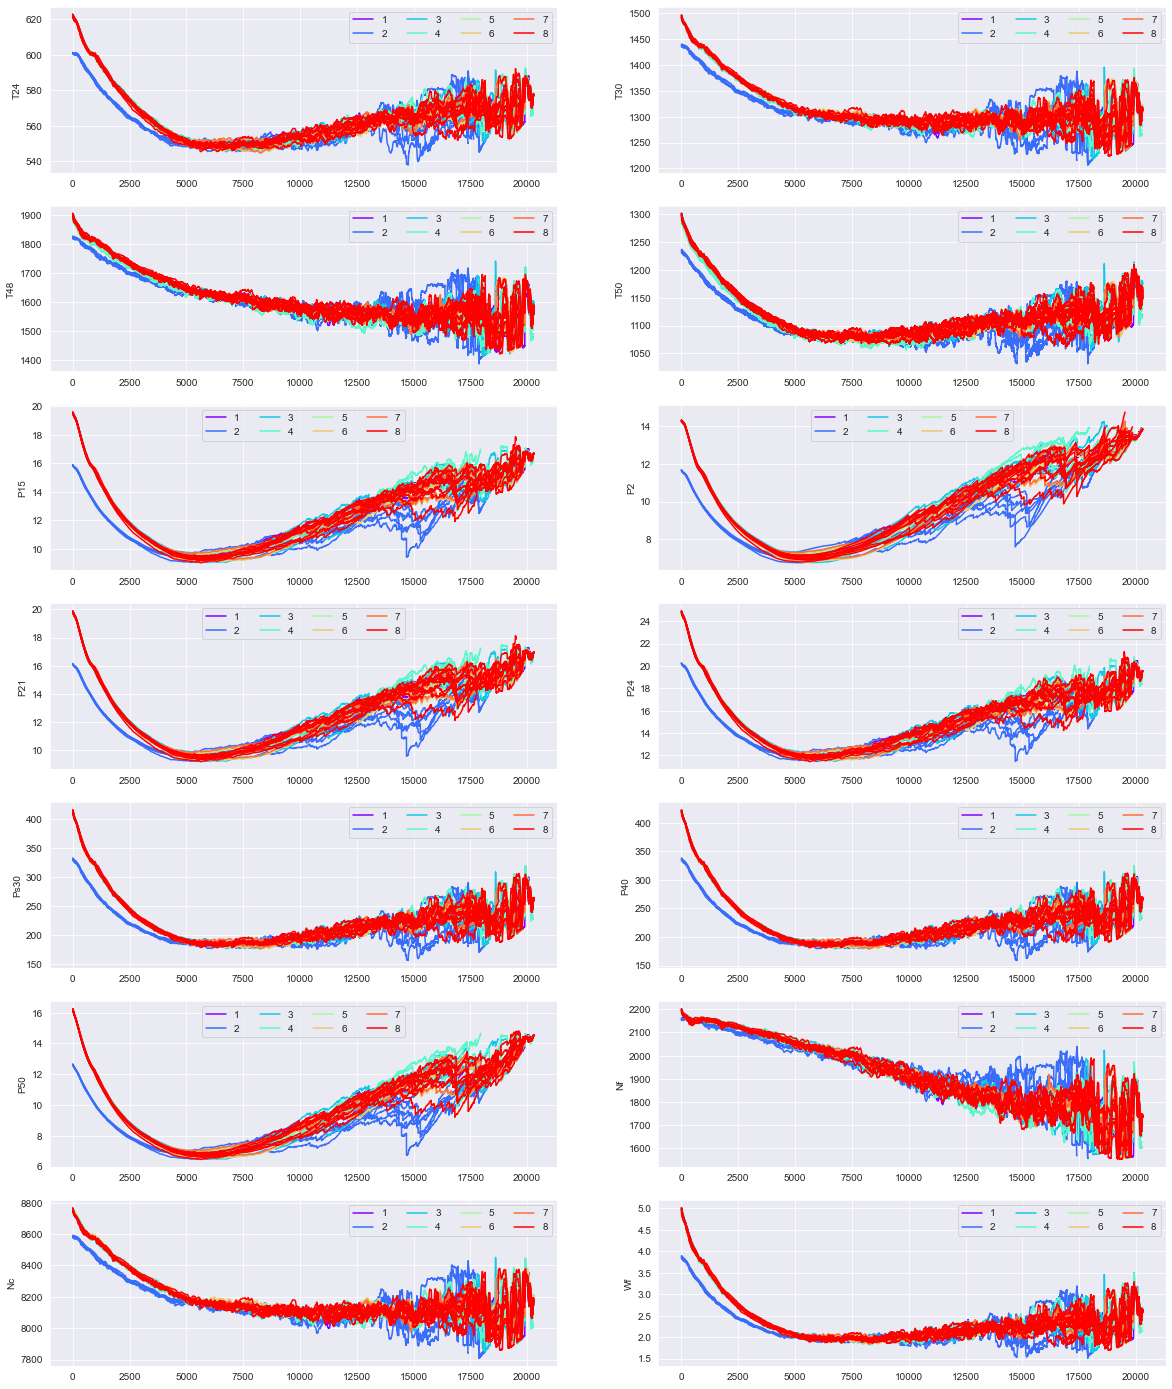

In [131]:
sensorplot3(conv_units)

## Zooming in on a single engine

one plot looking at first 5 flights vs last 5 flights. 


In [13]:
unit=X_train[X_train["unit"]==75]
unit=unit.loc[(X_train["cycle"]<6)|(X_train["cycle"]>67)]
unit

alt      Mach        TRA          T2         T24          T30  \
35076803  3003.0  0.392490  84.286507  523.610962  632.830627  1525.667236   
35076804  3008.0  0.392994  84.286507  523.633362  632.859497  1525.696777   
35076805  3012.0  0.393561  84.286507  523.662781  632.889893  1525.725098   
35076806  3020.0  0.394254  84.286507  523.689392  632.920349  1525.759155   
35076807  3026.0  0.394947  84.286507  523.723267  632.955994  1525.785522   
...          ...       ...        ...         ...         ...          ...   
35397902  3010.0  0.387639  27.245899  523.200745  575.125000  1279.371460   
35397903  3008.0  0.387702  27.245899  523.211670  575.152039  1279.415771   
35397904  3005.0  0.386694  27.245899  523.146118  575.093567  1279.347290   
35397905  3005.0  0.386442  27.245899  523.125000  575.070007  1279.340088   
35397906  3002.0  0.386190  27.245899  523.116516  575.063660  1279.336182   

                  T48          T50        P15         P2  ...         P40  \
35076803  1953.949585  1319.505371  20.431551  14.614995  ...  455.757263   
35076804  1953.927856  1319.441528  20.433361  14.616348  ...  455.774902   
35076805  1953.948364  1319.424072  20.435965  14.618607  ...  455.801300   
35076806  1953.952637  1319.375122  20.437437  14.619858  ...  455.811798   
35076807  1953.952515  1319.329102  20.440027  14.622167  ...  455.827301   
...               ...          ...        ...        ...  ...         ...   
35397902  1513.855957  1143.279419  16.895678  14.572997  ...  241.584824   
35397903  1513.580322  1143.002808  16.898352  14.574440  ...  241.622559   
35397904  1513.513184  1143.007446  16.892830  14.568426  ...  241.581070   
35397905  1513.610962  1143.098022  16.890812  14.566336  ...  241.578171   
35397906  1513.620605  1143.123413  16.890837  14.566027  ...  241.584091   

                P50           Nf           Nc        Wf  unit  cycle   Fc  \
35076803  16.731335  2271.183350  8867.826172  5.534608    75    1.0  1.0   
35076804  16.729315  2271.271729  8867.930664  5.534581    75    1.0  1.0   
35076805  16.728308  2271.312256  8868.013672  5.534890    75    1.0  1.0   
35076806  16.725681  2271.397949  8868.125000  5.534886    75    1.0  1.0   
35076807  16.723509  2271.452393  8868.204102  5.534967    75    1.0  1.0   
...             ...          ...          ...       ...   ...    ...  ...   
35397902  14.323915  1618.810791  8039.062988  2.253044    75   72.0  1.0   
35397903  14.323810  1619.067017  8039.349121  2.252464    75   72.0  1.0   
35397904  14.324755  1618.981201  8039.144531  2.252042    75   72.0  1.0   
35397905  14.325039  1618.911865  8039.095215  2.252322    75   72.0  1.0   
35397906  14.326400  1618.891602  8039.083008  2.252420    75   72.0  1.0   

           hs  Dataset Number  
35076803  1.0             8.0  
35076804  1.0             8.0  
35076805  1.0             8.0  
35076806  1.0             8.0  
35076807  1.0             8.0  
...       ...             ...  
35397902  0.0             8.0  
35397903  0.0             8.0  
35397904  0.0             8.0  
35397905  0.0             8.0  
35397906  0.0             8.0  

[43502 rows x 23 columns]

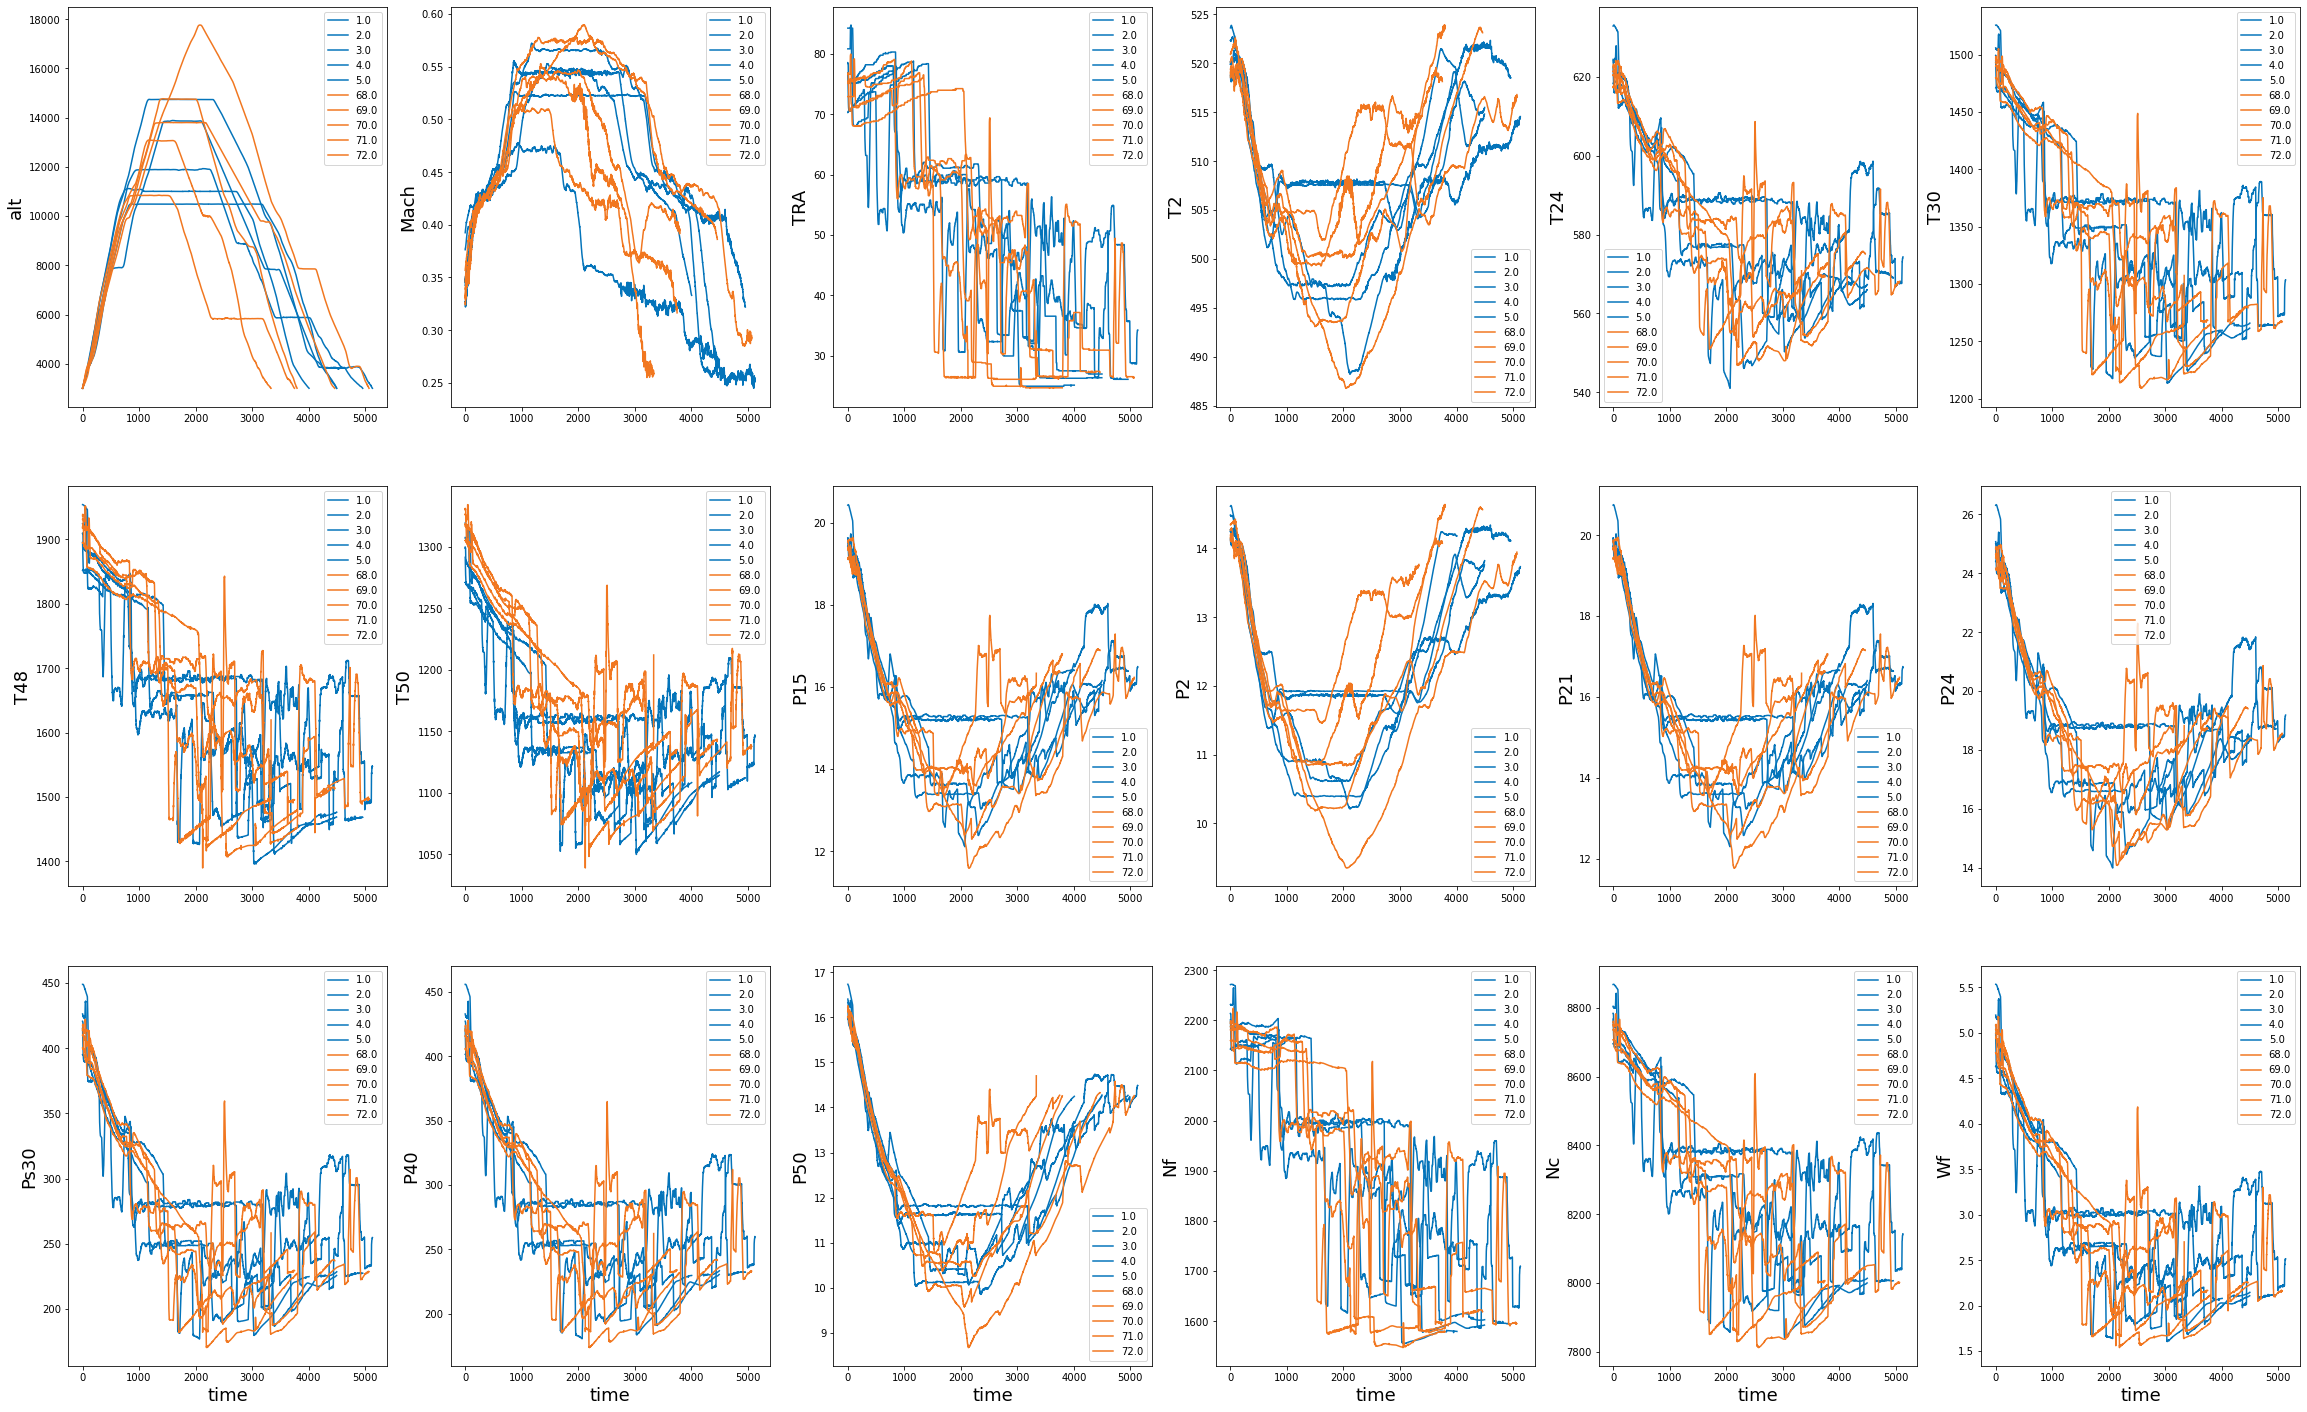

In [20]:
def sensorplot(data):
    
    cycles = data['cycle'].unique()
    
    sensorNames=data.columns
    sensorNames=sensorNames.drop(["cycle"])
    fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(40, 25))
    x=0
    color=""
    for j in range(0,3):
        for k in range(0,6):
            for i in cycles:
                if i<6:
                    color = "#0474BA"
                else:
                    color = "#F17720"
                values=data[data["cycle"]==i].reset_index()[sensorNames[x]]
                axes[j,k].plot(values,label=i,color=color)
                axes[j,k].set_ylabel(sensorNames[x], fontsize=18)
                axes[j,k].legend()

                
                if j > 1: 
                    axes[j,k].set_xlabel('time', fontsize=18)
                
            x+=1

    plt.savefig('Figures/Sensors_cycles.png',dpi=700)
    plt.show()
    
    
sensorplot(unit)
    

# Comparison of variations in sensors measurements between different flight classes

In [219]:
def convert(cycles):
    allCycles=pd.DataFrame()
    for i in cycles:
        x=i[1].reset_index()
        allCycles=pd.concat([allCycles,x])
    return allCycles.drop(["cycle"],axis=1)

In [220]:
#Choosing 1 unit for each flight class

unit1=convert(X_train[X_train["unit"]==1].drop(columns=["alt","Mach","TRA","T2",'unit', 'Fc', 'hs', 'Dataset Number']).groupby("cycle"))
unit2=convert(X_train[X_train["unit"]==2].drop(columns=["alt","Mach","TRA","T2",'unit', 'Fc', 'hs', 'Dataset Number']).groupby("cycle"))
unit3=convert(X_train[X_train["unit"]==3].drop(columns=["alt","Mach","TRA","T2",'unit', 'Fc', 'hs', 'Dataset Number']).groupby("cycle"))

In [221]:
unit1=unit1.groupby(unit1.index).mean().drop(["index"],axis=1)
unit2=unit2.groupby(unit2.index).mean().drop(["index"],axis=1)
unit3=unit3.groupby(unit3.index).mean().drop(["index"],axis=1)

In [232]:
def sensorplot2(data,data2,data3):
    sns.set_palette("crest")
    fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(20, 25))
    x=0
    sensorNames=data.columns
    for j in range(0,7):
        for k in range(0,2):
            values=data[sensorNames[x]]
            values2=data2[sensorNames[x]]
            values3=data3[sensorNames[x]]
            axes[j,k].plot(values,label="Unit 1")
            axes[j,k].plot(values2,label="Unit 2")
            axes[j,k].plot(values3,label="Unit 3")
            axes[j,k].set_ylabel(sensorNames[x])
            axes[j,k].legend()
            x+=1
    plt.savefig('Figures/Sensors_Fc.png',dpi=200)

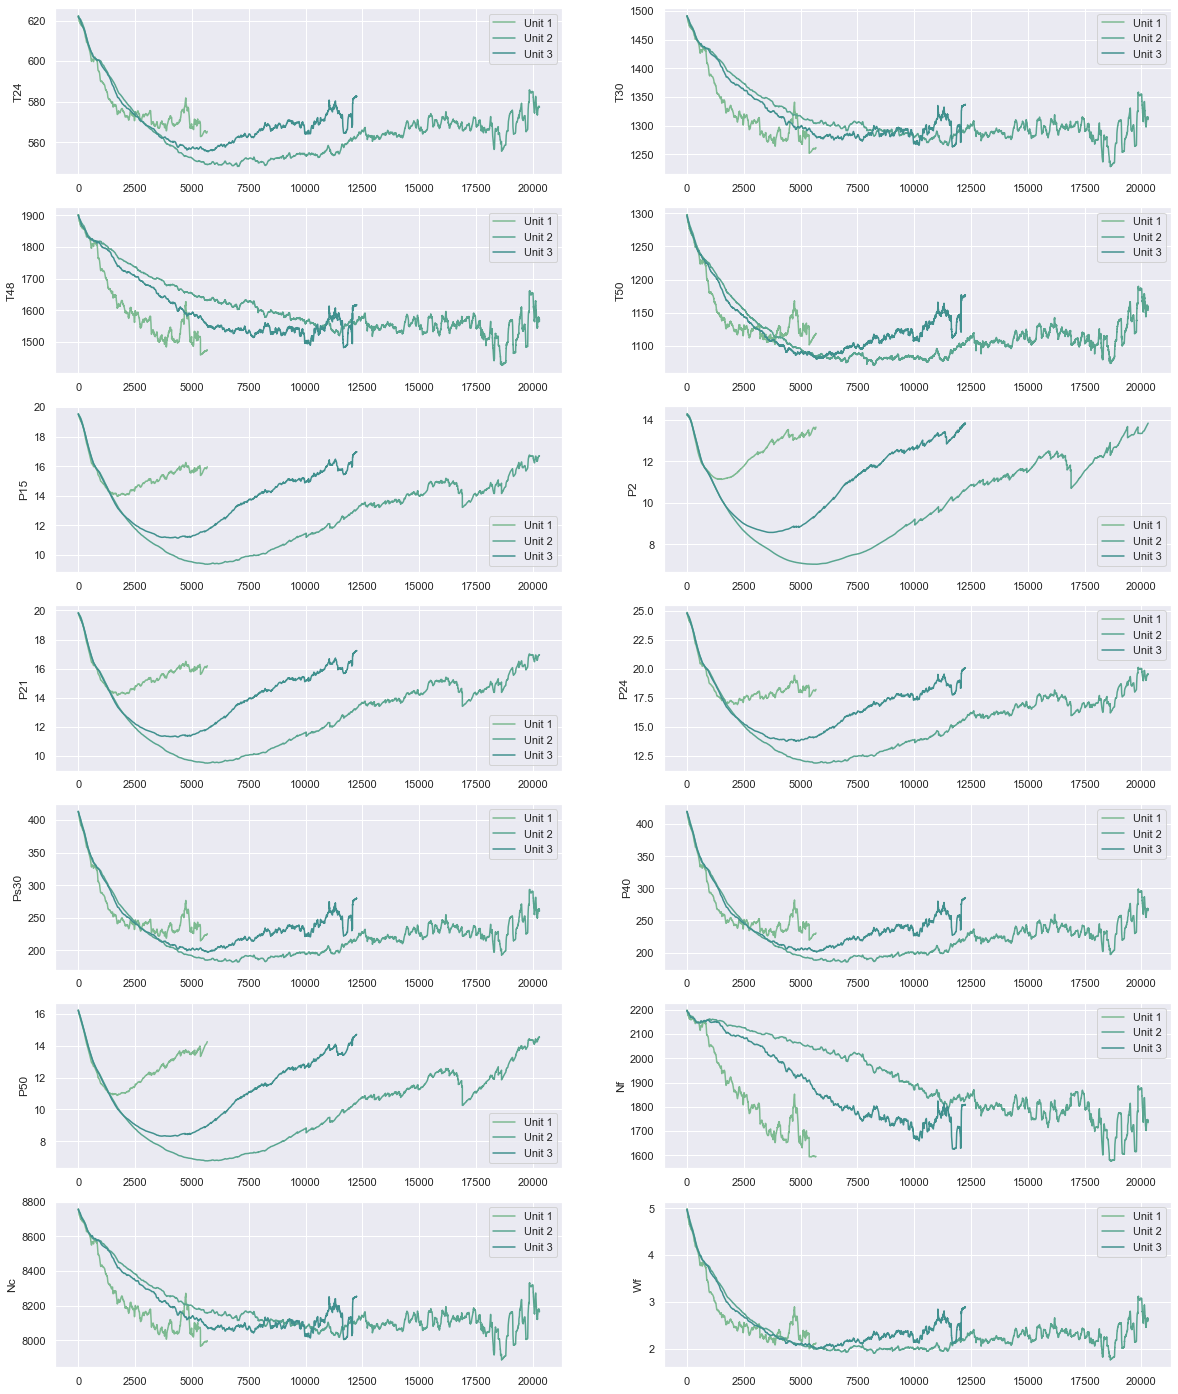

In [233]:
sensorplot2(unit1,unit2,unit3)

# Checking the Correlations between the variables

In [13]:
corr = X_train.drop(columns=['unit', 'cycle', 'Fc', 'hs', 'Dataset Number']).corr()

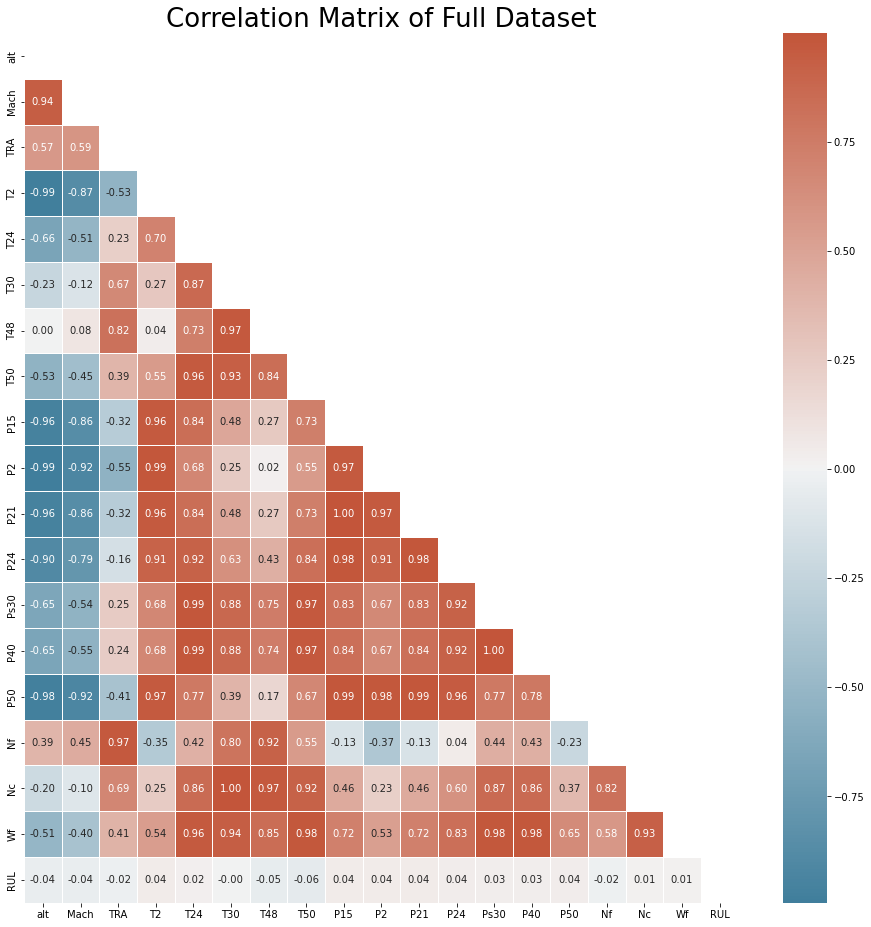

In [14]:
plt.figure(figsize=(16,16))

# Generate a mask for the upper triangle (this just makes the top part of the triangle all 0s)
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.title('Correlation Matrix of Full Dataset', fontsize=26)

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.savefig('Figures/Correlation.png',dpi=200)
plt.show()